<a href="https://colab.research.google.com/github/rakshal123/Introduction-To-Tensorflow/blob/main/01_tensorflow_intro_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intoduction To Regression with Neural Networks in TensorFlow

Regression is to predict a numerical value for a variableusing the other features.

In [ ]:
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.4.1'

# Creating the Data to view and fit

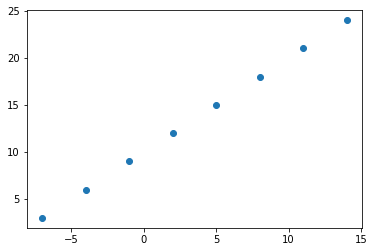

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create the labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it

plt.scatter(X,y)

###INPUT and output shapes

In [ ]:
# Turn the numpy arrays into Tensors

X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape,output_shape

(TensorShape([]), TensorShape([]))

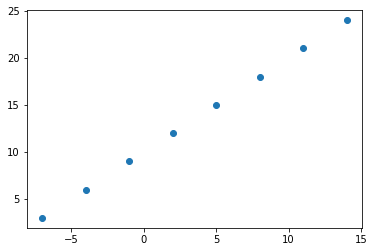

In [ ]:
plt.scatter(X,y)

### Steps in Modelling with TensorFlow

1. **Creating the Model** - define the input and output layers, as well as the hidden layers of the model
2. **Compiling a Model** - define the loss function and optimizer(tells our model how to improve the patterns it is learning) and evaluation metrics(what can we use to interpret the performance of our model).
3. **Fitting a Model** - letting the model try to find patterns between X & y(features and labels).

In [ ]:
# Set the Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(steps_per_execution=1,loss = tf.keras.losses.mae, # mae is Mean Absolute error
              optimizer = tf.keras.optimizers.SGD(), #short for stochastic gradient descent
              metrics = ["mae"])

#3. Fit the Model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 458ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict(X)

array([[-5.16542  ],
       [-2.9302402],
       [-0.69506  ],
       [ 1.54012  ],
       [ 3.7753   ],
       [ 6.0104804],
       [ 8.245661 ],
       [10.480841 ]], dtype=float32)

### Improving our Model
We can improve our model by altering the steps we take in creating the model-

1. **Creating a Model** - here we might add more layers, increase the number of hidden units(all called neurons)within each of the hidden layers, change the activation function of each layer.
2. **Compiling a Model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a Model**  - here we might fit a model for more **epochs**(leave it training for longer) or more data (give the model more examples to learn from).

In [ ]:
# let's rebuild the model

#1. Create the Model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(100,activation = "relu"),
            tf.keras.layers.Dense(100,activation = "relu"),
            tf.keras.layers.Dense(1)
])

#2. Compile a Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 399ms/step - loss: 13.3491 - mae: 13.3491
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 16.2247 - mae: 16.2247
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0442 - mae: 7.0442
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 5.1066 - mae: 5.1066
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9798 - mae: 8.9798
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 4.8204 - mae: 4.8204
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1848 - mae: 8.1848
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.1161 - mae: 6.1161
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3492 - mae: 5.3492
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 4.7587 - mae: 4.7587
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 3

In [ ]:
model.predict([27.0])

array([[36.007446]], dtype=float32)

### Evaluating A Model

The way we will go through while making a model is

```
Build a model-> fit it -> evaluate it -> tweak a model -> fit it ->evaluate it ->tweak a model ->fit it -> evaluate it ->tweak it.....
```

When it comes to evaluation we need to **Visualize**

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - what does our model looks like
* The training of the Model - how does the model performs when it learns
* The prediction of the Model - how does the prediction model line up against the ground truth(the original labels)?


 



In [ ]:
X = tf.cast(tf.range(-100,100,4),dtype=tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [ ]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

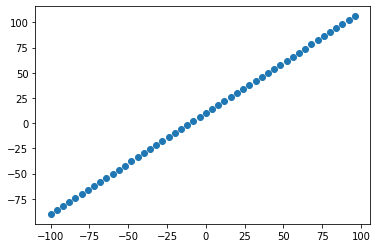

In [ ]:
# Visualize the Data
plt.scatter(X,y)

### Three Sets

* Training Set
* Validation Set - get tuned on this data(model is tweaked om this data)
* Test Set - Model gets evaluated on this data


In [ ]:
# Split the data into train and test sets
X_train = X[:40]# first samples are training samples
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

### Visualize the Data

Now we have our data in training and tests sets...now we must visualize our data

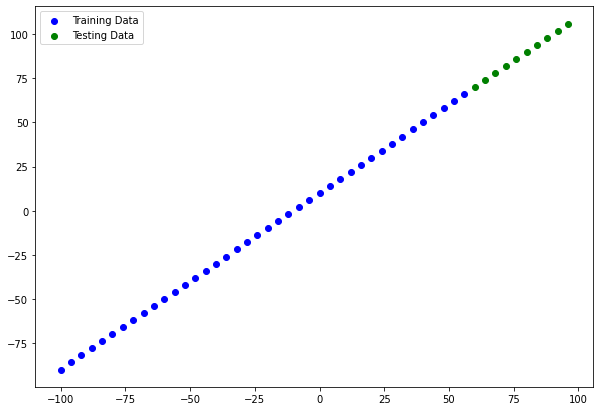

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label = "Training Data")
# Plot the Test Data in green
plt.scatter(X_test,y_test,c="g",label="Testing Data")
# Show a legend
plt.legend()

In [ ]:
# Lets have a look at how to create a neural Network for our data

#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1)
])

#2. Compile the Model
model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics = ["mse"])

#3. Fit in the Model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 1963.3494 - mse: 1963.3494
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 569.3786 - mse: 569.3786
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 377.9532 - mse: 377.9532
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 125.7577 - mse: 125.7577
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 133.2490 - mse: 133.2490
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 90.0620 - mse: 90.0620
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 319.9687 - mse: 319.9687
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 40.0685 - mse: 40.0685
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 203.0557 - mse: 203.0557
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 97.9379 - mse: 97.9379
Epoch 11/100
2/2 [=========================

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Trainable Parameters - these are the parameters (patterns)the model can update as it trains

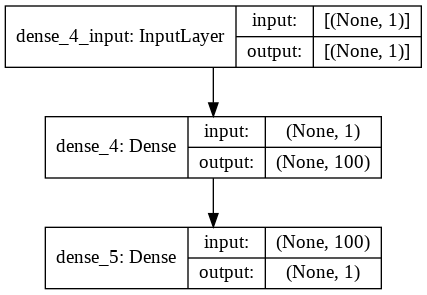

In [ ]:
# If we have to visualize our model

from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing Our Model Prediction
To visualize our Model Prediction,it's a good idea to plot them against the ground truth(y_pred vs y_test)

In [ ]:
# Make some Prediction

y_pred = model.predict(X_test)
y_pred

array([[ 69.71847 ],
       [ 73.648224],
       [ 77.57798 ],
       [ 81.50794 ],
       [ 85.43809 ],
       [ 89.36825 ],
       [ 93.29839 ],
       [ 97.23292 ],
       [101.16927 ],
       [105.10566 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

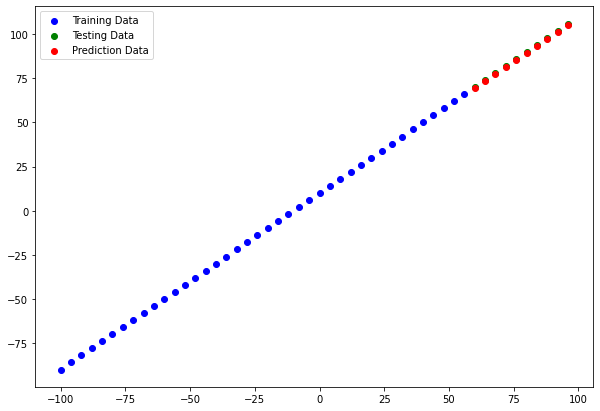

In [ ]:
# Make a pred/plot function

def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
  """
  Plot Training Data, Test Data and compare the predictions to the ground reality
  """
  plt.figure(figsize=(10,7))
  #Plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  #Plot the test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  # Plot the predicted data in red
  plt.scatter(test_data,predictions,c="r",label="Prediction Data")
  #Plot legends
  plt.legend()
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

### Evaluating our model's prediction using regression evaluation metrics

Depending on the problem working on there will be different evaluation metrics to evaluate our model's performance

Since we are working on regresion, the two of the main metrics are:
* MAE : Mean Absolute error
* MSE : Mean Square Error

In [ ]:
# Evaluate the model on test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.3909 - mse: 0.3909


[0.39087194204330444, 0.39087194204330444]

In [ ]:
# Calcluate the mean absolute error

y_pred-y_test#This output is comming because the shapes are different

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[ -0.2815323 ,  -4.2815323 ,  -8.281532  , -12.281532  ,
        -16.281532  , -20.281532  , -24.281532  , -28.281532  ,
        -32.281532  , -36.281532  ],
       [  3.6482239 ,  -0.35177612,  -4.351776  ,  -8.351776  ,
        -12.351776  , -16.351776  , -20.351776  , -24.351776  ,
        -28.351776  , -32.351776  ],
       [  7.57798   ,   3.57798   ,  -0.42201996,  -4.42202   ,
         -8.42202   , -12.42202   , -16.42202   , -20.42202   ,
        -24.42202   , -28.42202   ],
       [ 11.507942  ,   7.507942  ,   3.5079422 ,  -0.4920578 ,
         -4.492058  ,  -8.492058  , -12.492058  , -16.492058  ,
        -20.492058  , -24.492058  ],
       [ 15.438087  ,  11.438087  ,   7.4380875 ,   3.4380875 ,
         -0.56191254,  -4.5619125 ,  -8.561913  , -12.561913  ,
        -16.561913  , -20.561913  ],
       [ 19.368248  ,  15.368248  ,  11.368248  ,   7.368248  ,
          3.368248  ,  -0.631752  ,  -4.631752  ,  -8.631752 

In [ ]:
y_pred = tf.constant(y_pred)
y_pred.shape,y_test.shape

(TensorShape([10, 1]), TensorShape([10]))

In [ ]:
# in order to take out the mean absolute error metric we need to mke their shapes same
y_pred = tf.squeeze(y_pred)
y_pred.shape,y_test.shape 

(TensorShape([10]), TensorShape([10]))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5934807>

In [ ]:
# Let's make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.MAE(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.MSE(y_true = y_true,y_pred = tf.squeeze(y_pred))


### Running Experiments to improve our Model

1. Get more Data
2. Make your model larger(using more complex models)
3. Train for longer

Let's use three Models:

1. `model_1`- the same as the original model, 1 layer, trained for 100 epochs.
2. `model_2`- 2 layers ,trained for 100 epochs
3. `model_3`- 2 layers, trained for 500 epochs

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [ ]:
# Build model_1

# set the random seed
tf.random.set_seed(42)

# create the Model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the Model

model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
#Fit the model

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss:

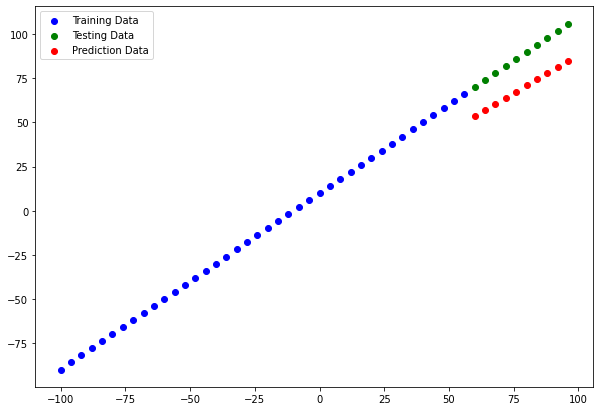

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate the evaluation Metrics

mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Build model_2

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 77.0856 - mae: 77.0856
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 17.0775 - mae: 17.0775
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 20.1814 - mae: 20.1814
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5192 - mae: 12.5192
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.1468 - mae: 14.1468
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.6317 - mae: 11.6317
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.8263 - mae: 12.8263
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2822 - mae: 11.2822
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 41.5593 - mae: 41.5593
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.6300 - mae: 27.6300
Epoch 11/100
2/2 [==============================] - 0s 6ms/

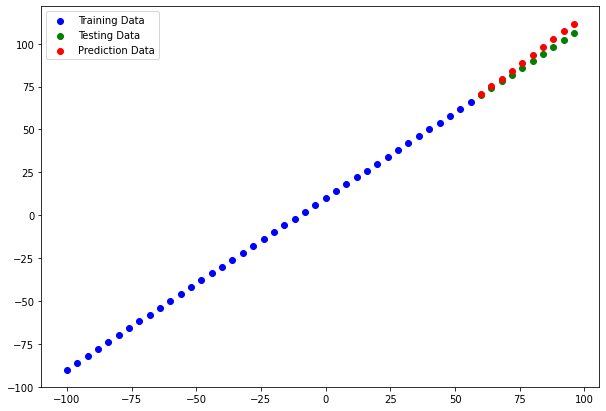

In [ ]:
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497052>)

In [ ]:
# Build third Model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 41.4177 - mae: 41.4177
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 32.0698 - mae: 32.0698
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 30.0433 - mae: 30.0433
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 15.2807 - mae: 15.2807
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 22.8485 - mae: 22.8485
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1903 - mae: 11.1903
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 12.4170 - mae: 12.4170
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1360 - mae: 11.1360
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.6650 - mae: 40.6650
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 26.8762 - mae: 26.8762
Epoch 11/500
2/2 [==============================] - 0s 6ms

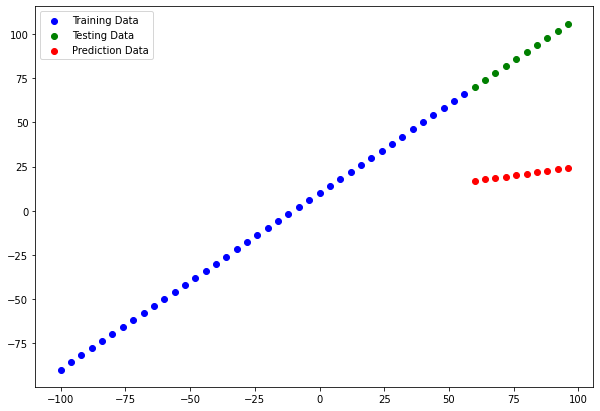

In [ ]:
y_pred_3 = model_3.predict(X_test)

#Plot the predictions
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42993>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4630.3647>)

### Compairing the results of our expermiments

In [ ]:
# Let's compare results using pandas DataFrames

import pandas as pd

model_results = [["Model_1",mae_1.numpy(),mse_1.numpy()],
                 ["Model_2",mae_2.numpy(),mse_2.numpy()],
                 ["Model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["Model","mae","mse"])
all_results

,Model,mae,mse
0,Model_1,18.745327,353.573364
1,Model_2,3.110995,12.497052
2,Model_3,67.429932,4630.364746


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


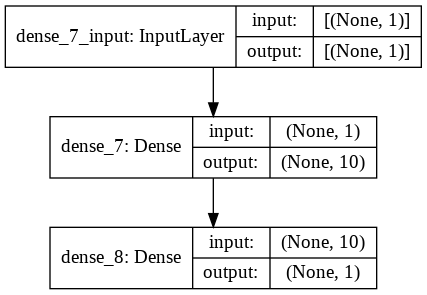

In [ ]:


plot_model(model_2,show_shapes=True)

### Saving our Models

This allows us to use them outside colab.

In [ ]:
model_2.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
# Loading a SavedModel

loaded_SavedModel_format= tf.keras.models.load_model("my_model")

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Comapre model_2 predictions with the loaded_SaveModel_format

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###A larger Example for Regression

In [ ]:
# import the required libraries

import pandas as pd
import tensorflow as tf

In [ ]:
#Reas the insurance Dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# This is how to one-hot-encode dataframes in pandas
insurance = pd.get_dummies(insurance)
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create features and labels

X = insurance.drop("charges",axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y = insurance["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating a training and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network

tf.random.set_seed(42)

#1. Create a model

insurance_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#2. Compile the model

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/200
34/34 [==============================] - 0s 958us/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/200
34/34 [==============================] - 0s 978us/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/200
34/34 [==============================] - 0s 954us/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/200
34/34 [==============================] - 0s 890us/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/200
34/34 [==============================] - 0s 890us/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/200
34/34 [==============================] - 0s 925us/step - loss: 7520.6838 - 

In [ ]:
# Check the results of insurance model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5498.5771 - mae: 5498.5771


[5498.5771484375, 5498.5771484375]

In [ ]:
# Create a new model with one more extra layer
# Set the random seed

insurance_model_1 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#3.Fit the model
insurance_model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13276.2880 - mae: 13276.2880
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12801.0042 - mae: 12801.0042
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12313.0262 - mae: 12313.0262
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12470.5328 - mae: 12470.5328
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11411.5052 - mae: 11411.5052
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9887.3426 - mae: 9887.3426
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8479.6971 - mae: 8479.6971
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7779.4158 - mae: 7779.4158
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7548.3081 - mae: 7548.3081
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7661.2947 - mae:

In [ ]:
# Evaluate the larger

insurance_model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4850.1934 - mae: 4850.1934


[4850.193359375, 4850.193359375]

In [ ]:
X_train.shape

(1070, 11)

In [ ]:
# Create the model with 200 epochs

# Set the random seed
tf.random.set_seed(42)

#1. Ceate the model

insurance_model_3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(11),
                    tf.keras.layers.Dense(100,activation="relu"),
                    tf.keras.layers.Dense(100,activation="relu"),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)
])

#2. Compile the model

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adamax(),
                          metrics = ["mae"])
#3. Fit the model

history = insurance_model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13255.1039 - mae: 13255.1039
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12676.1626 - mae: 12676.1626
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 11722.9429 - mae: 11722.9429
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 10668.7938 - mae: 10668.7938
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 8105.9567 - mae: 8105.9567
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7521.1880 - mae: 7521.1880
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7364.9373 - mae: 7364.9373
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7440.1977 - mae: 7440.1977
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7427.2848 - mae: 7427.2848
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7526.7132 - mae: 7

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1955.5321 - mae: 1955.5321


[1955.5321044921875, 1955.5321044921875]

Text(0, 0.5, 'loss')

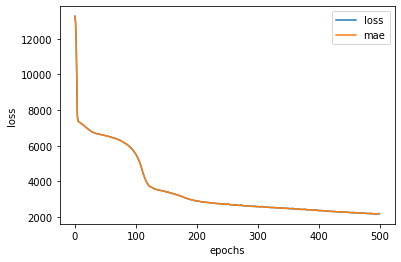

In [ ]:
# Plot the history curve(loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

### Preprocessing Data(Standardisation And Normalisation)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the csv insurance file

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

To Prepare our data we can borrow some classes from scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column Transformer

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# turn all these values in these between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#Fit the column Transformer to our training data

ct.fit(X_train)

# Transform training and test data with normalisation(MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Let's Build a neural network model on normalized data

X_train_normal = tf.constant(X_train_normal)
X_test_normal = tf.constant(X_test_normal)

In [ ]:
 # First Model on normalised data

tf.random.set_seed(42)
 insurance_model_1 = tf.keras.Sequential([
                      tf.keras.layers.Dense(100),
                      tf.keras.layers.Dense(11),
                      tf.keras.layers.Dense(1)
 ])

 # Compile the model

 insurance_model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                         metrics=["mae"])
 
 # Fit the model

 history = insurance_model.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 3563.4994 - mae: 3563.4994
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 3333.9391 - mae: 3333.9391
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 3257.8178 - mae: 3257.8178
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 3237.5192 - mae: 3237.5192
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 3572.6893 - mae: 3572.6893
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 3472.5742 - mae: 3472.5742
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 3286.3246 - mae: 3286.3246
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 3562.6682 - mae: 3562.6682
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 3473.8166 - mae: 3473.8166
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 3423.2904 - mae: 3423.2904

Text(0, 0.5, 'Loss')

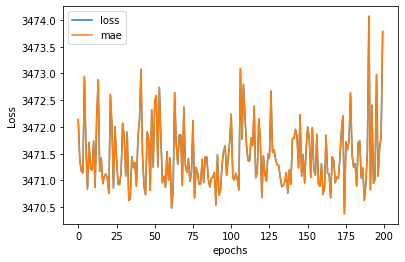

In [ ]:
pd.DataFrame(history.history).plot()

plt.xlabel("epochs")
plt.ylabel("Loss")

In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3159.5984 - mae: 3159.5984


[3159.598388671875, 3159.598388671875]